**ADVANCED LEVEL TASK**

---


***TASk 2:  Next Word Prediction***



---



---





In [1]:
import numpy as np
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

In [2]:
path = '1661-0.txt'
#Reading the datset using open() method and then converting it into lowercase
Data = open(path, "r" ,encoding  = 'utf8').read().lower()


In [3]:
Corpus_length = len(Data)
print('Corpus length is :', Corpus_length)

Corpus length is : 581888


In [4]:
file = open(path, "r", encoding = "utf8")
lines = []

for line in file:
    lines.append(line)

In [5]:
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(Data)

In [6]:
print(words[:20], sep = " ")

['project', 'gutenberg', 's', 'the', 'adventures', 'of', 'sherlock', 'holmes', 'by', 'arthur', 'conan', 'doyle', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone']


In [7]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

In [8]:
character = sorted(list(set(Data)))
char_indices = dict((c, i) for i, c in enumerate(character))
indices_char = dict((i, c) for i, c in enumerate(character))

#Printing number of unique characters
print(f'unique chars: {len(character)}')

unique chars: 73


In [9]:
sequence_len = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(Data) - sequence_len, step):
    sentences.append(Data[i: i + sequence_len ])
    next_chars.append(Data[i + sequence_len])
print(f'num training examples: {len(sentences)}')

num training examples: 193950


In [10]:
X = np.zeros((len(sentences), sequence_len, len(character)), dtype=np.bool)
y = np.zeros((len(sentences), len(character)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14532\3692717735.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.zeros((len(sentences), sequence_len, len(character)), dtype=np.bool)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14532\3692717735.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.zeros((len(sentences), le

In [11]:
sentences[124]

'\nauthor: arthur conan doyle\n\nrelease dat'

In [12]:
next_chars[100]

'e'

In [13]:
#one hot encoded data
X[0][0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True])

In [14]:
#one hot encoded data
y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [15]:
X.shape

(193950, 40, 73)

In [16]:
y.shape

(193950, 73)

In [17]:
model = Sequential()
model.add(LSTM(128, input_shape=(sequence_len, len(character))))
model.add(Dense(len(character)))
model.add(Activation('softmax'))

In [18]:
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               103424    
                                                                 
 dense (Dense)               (None, 73)                9417      
                                                                 
 activation (Activation)     (None, 73)                0         
                                                                 
Total params: 112,841
Trainable params: 112,841
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [19]:
optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, y, validation_split=0.01, batch_size=128, epochs=50, shuffle=True).history

Epoch 1/50
1501/1501 [==============================] - 73s 47ms/step - loss: 1.9676 - accuracy: 0.4217 - val_loss: 2.1592 - val_accuracy: 0.3979
Epoch 2/50
1501/1501 [==============================] - 74s 49ms/step - loss: 1.6178 - accuracy: 0.5158 - val_loss: 2.0372 - val_accuracy: 0.4459
Epoch 3/50
1501/1501 [==============================] - 73s 49ms/step - loss: 1.5207 - accuracy: 0.5420 - val_loss: 2.0257 - val_accuracy: 0.4655
Epoch 4/50
1501/1501 [==============================] - 74s 49ms/step - loss: 1.4703 - accuracy: 0.5560 - val_loss: 2.0344 - val_accuracy: 0.4644
Epoch 5/50
1501/1501 [==============================] - 77s 51ms/step - loss: 1.4381 - accuracy: 0.5652 - val_loss: 1.9896 - val_accuracy: 0.4840
Epoch 6/50
1501/1501 [==============================] - 77s 51ms/step - loss: 1.4131 - accuracy: 0.5704 - val_loss: 1.9898 - val_accuracy: 0.4784
Epoch 7/50
1501/1501 [==============================] - 75s 50ms/step - loss: 1.3965 - accuracy: 0.5752 - val_loss: 2.0203 -

In [20]:
model.save('word_prediction_model.h5')
pickle.dump(history, open("history.p", "wb"))

In [21]:
model = load_model('word_prediction_model.h5')
history = pickle.load(open("history.p", "rb"))


In [22]:
loss_and_acc=model.evaluate(X,y)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

6061/6061 [==============================] - 50s 8ms/step - loss: 1.2082 - accuracy: 0.6267
Test Loss 1.2081577777862549
Test Accuracy 0.6266563534736633


In [23]:

acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(len(acc))


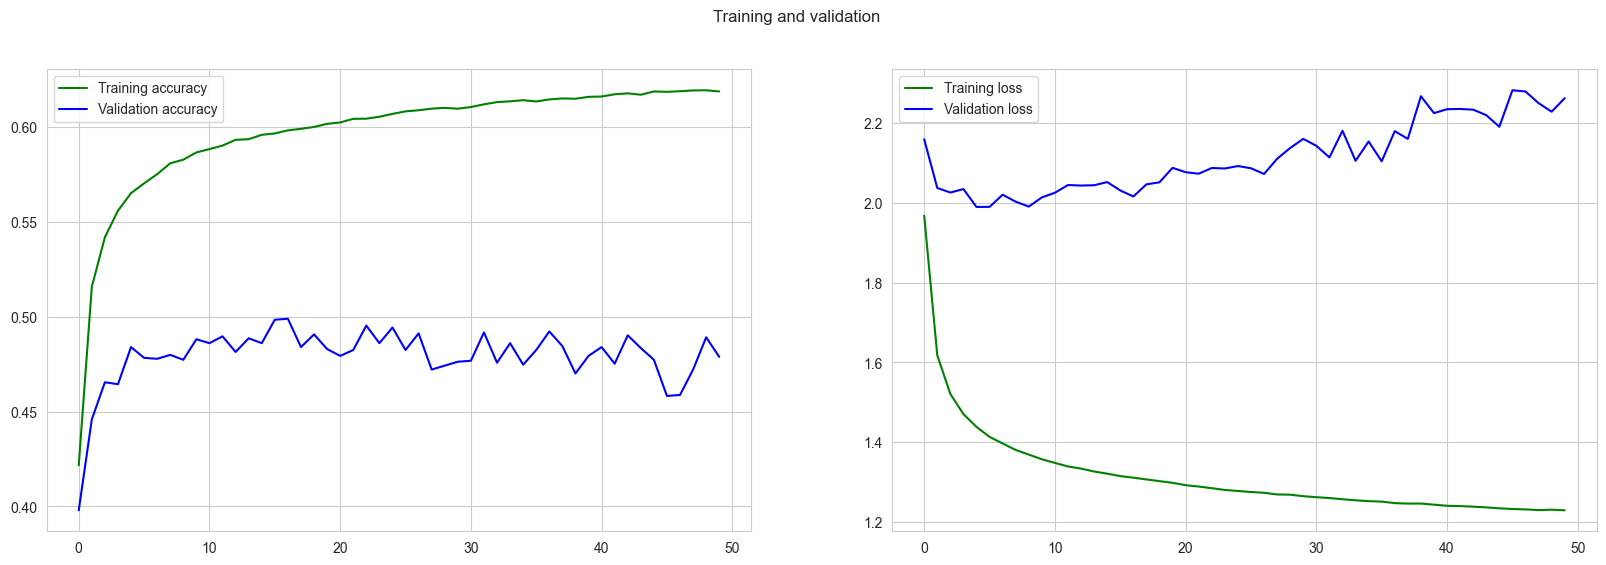

In [24]:
import seaborn as sns
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'g', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'g', label='Training loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()


In [25]:
def prepare_input(text):
    x = np.zeros((1, sequence_len, len(character)))
    for t, char in enumerate(text):
        x[0, t, char_indices[char]] = 1.

    return x

In [26]:
prepare_input("This is an example of input of our model".lower())

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [27]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)

    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [28]:
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char

        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

In [29]:
def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]


In [30]:

quotes = [
    "Artificial intelligence is about making computers act more like humans.",
    "Machine learning  is the study of computer algorithms that improve automatically through experience and by the use of data.",
    "It is not a lack of love, but a lack of friendship that makes unhappy marriages.",
    " A machine with artificial intelligence can determine the cause of action",
    "Thanks you Lets Grow More for giving me this opportunity."

]

In [31]:
for q in quotes:
    seq = q[:40].lower()
    print(seq)
    print(predict_completions(seq, 5))
    print()


artificial intelligence is about making 
['the ', 'and ', 'in ', 'out ', 'his ']

machine learning  is the study of comput
['e ', 'ance ', 'ion ', 'y ', 'once ']

it is not a lack of love, but a lack of 
['the ', 'a ', 'me. ', 'his ', 'some ']

 a machine with artificial intelligence 
['to ', 'which ', 'and ', 'in ', 'of ']

thanks you lets grow more for giving me 
['to ', 'with ', 'and ', 'from ', 'in ']

